In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/drive/MyDrive/Certificate/Media/FaceMaskDetection/Project/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1082.jpg', 'with_mask_1147.jpg', 'with_mask_1172.jpg', 'with_mask_1128.jpg', 'with_mask_11.jpg']
['with_mask_477.jpg', 'with_mask_483.jpg', 'with_mask_470.jpg', 'with_mask_469.jpg', 'with_mask_3363.jpg']


In [ ]:
without_mask_files = os.listdir('/content/drive/MyDrive/Certificate/Media/FaceMaskDetection/Project/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_189.jpg', 'without_mask_1899.jpg', 'without_mask_1795.jpg', 'without_mask_1869.jpg', 'without_mask_1842.jpg']
['without_mask_504.jpg', 'without_mask_3448.jpg', 'without_mask_492.jpg', 'without_mask_3659.jpg', 'without_mask_3379.jpg']


with mask --> 1

without mask --> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


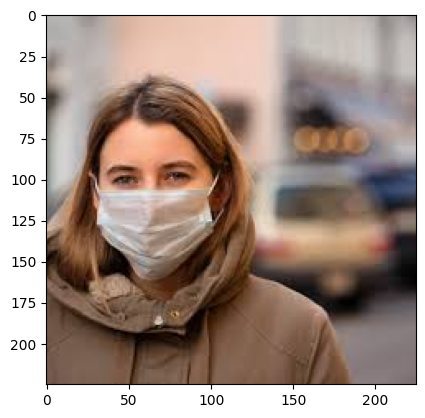

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/drive/MyDrive/Certificate/Media/FaceMaskDetection/Project/data/with_mask/with_mask_865.jpg')
imgplot = plt.imshow(img)
plt.show()

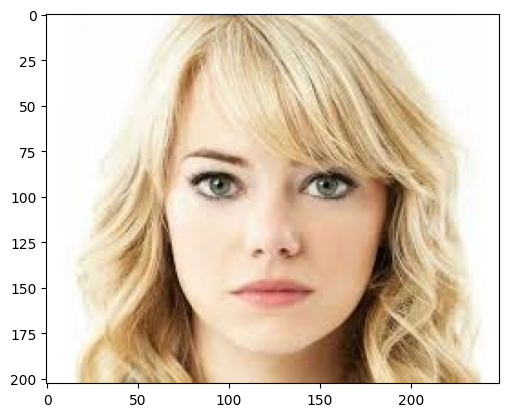

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/drive/MyDrive/Certificate/Media/FaceMaskDetection/Project/data/without_mask/without_mask_640.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

Resize the Images

Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/drive/MyDrive/Certificate/Media/FaceMaskDetection/Project/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/drive/MyDrive/Certificate/Media/FaceMaskDetection/Project/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[252, 252, 252],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[246, 246, 246],
        [196, 196, 196],
        [178, 178, 178],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[246, 246, 246],
        [184, 184, 184],
        [167, 167, 167],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[231, 232, 234],
        [223, 224, 226],
        [234, 235, 237],
        ...,
        [232, 232, 232],
        [243, 243, 243],
        [232, 232, 232]],

       [[226, 227, 229],
        [224, 225, 227],
        [229, 230, 232],
        ...,
        [233, 233, 233],
        [234, 234, 234],
        [229, 229, 229]],

       [[230, 231, 233],
        [236, 237, 239],
        [229, 230, 232],
        ...,
        [234, 234, 234],
        [238, 238, 238],
        [236, 236, 236]],

       ...,

       [[136, 125, 122],
        [115, 104, 101],
        [121, 110, 106],
        ...,
        [235, 235, 235],
        [237, 237, 237],
        [238, 238, 238]],

       [[153, 142, 138],
        [136, 125, 121],
        [141, 130, 124],
        ...,
        [226, 226, 226],
        [222, 222, 222],
        [227, 227, 227]],

       [[160, 150, 139],
        [151, 141, 131],
        [157, 148, 135],
        ...,
        [233, 233, 233],
        [233, 233, 233],
        [237, 237, 237]]

In [ ]:
X_train_scaled[0]

array([[[0.90588235, 0.90980392, 0.91764706],
        [0.8745098 , 0.87843137, 0.88627451],
        [0.91764706, 0.92156863, 0.92941176],
        ...,
        [0.90980392, 0.90980392, 0.90980392],
        [0.95294118, 0.95294118, 0.95294118],
        [0.90980392, 0.90980392, 0.90980392]],

       [[0.88627451, 0.89019608, 0.89803922],
        [0.87843137, 0.88235294, 0.89019608],
        [0.89803922, 0.90196078, 0.90980392],
        ...,
        [0.91372549, 0.91372549, 0.91372549],
        [0.91764706, 0.91764706, 0.91764706],
        [0.89803922, 0.89803922, 0.89803922]],

       [[0.90196078, 0.90588235, 0.91372549],
        [0.9254902 , 0.92941176, 0.9372549 ],
        [0.89803922, 0.90196078, 0.90980392],
        ...,
        [0.91764706, 0.91764706, 0.91764706],
        [0.93333333, 0.93333333, 0.93333333],
        [0.9254902 , 0.9254902 , 0.9254902 ]],

       ...,

       [[0.53333333, 0.49019608, 0.47843137],
        [0.45098039, 0.40784314, 0.39607843],
        [0.4745098 , 0

build cnn

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 156s 909ms/step - loss: 0.4530 - acc: 0.8014 - val_loss: 0.2991 - val_acc: 0.8595
Epoch 2/5
170/170 [==============================] - 149s 879ms/step - loss: 0.2908 - acc: 0.8795 - val_loss: 0.2313 - val_acc: 0.9041
Epoch 3/5
170/170 [==============================] - 152s 896ms/step - loss: 0.2335 - acc: 0.9020 - val_loss: 0.2255 - val_acc: 0.9107
Epoch 4/5
170/170 [==============================] - 152s 893ms/step - loss: 0.2018 - acc: 0.9194 - val_loss: 0.2444 - val_acc: 0.8942
Epoch 5/5
170/170 [==============================] - 152s 894ms/step - loss: 0.1540 - acc: 0.9369 - val_loss: 0.2326 - val_acc: 0.9190


model evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 10s 216ms/step - loss: 0.2170 - acc: 0.9219
Test Accuracy = 0.9219059944152832


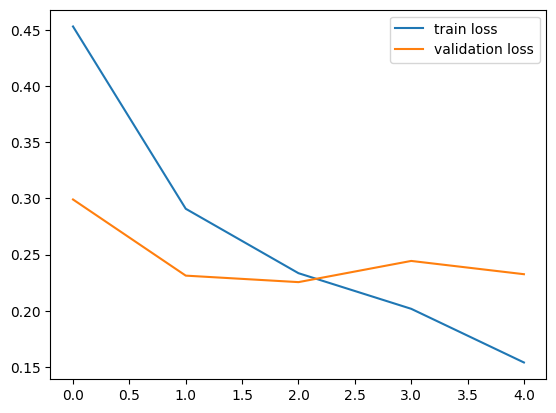

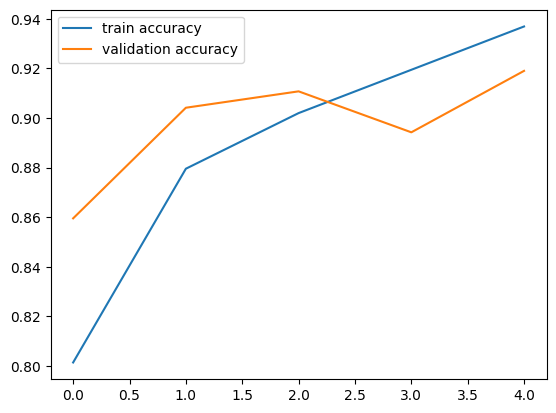

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

predictive sys

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
model.save("/content/drive/MyDrive/Certificate/Media/FaceMaskDetection/Project/mask_detection_model.h5")